In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Données
data = [3, 5, 7, 8, 10]

# Calcul de la moyenne
mean = np.mean(data)

# Calcul de la variance
variance = np.var(data)

In [11]:
# Calcul des écarts pour chaque point
deviations = [(x - mean)**2 for x in data]

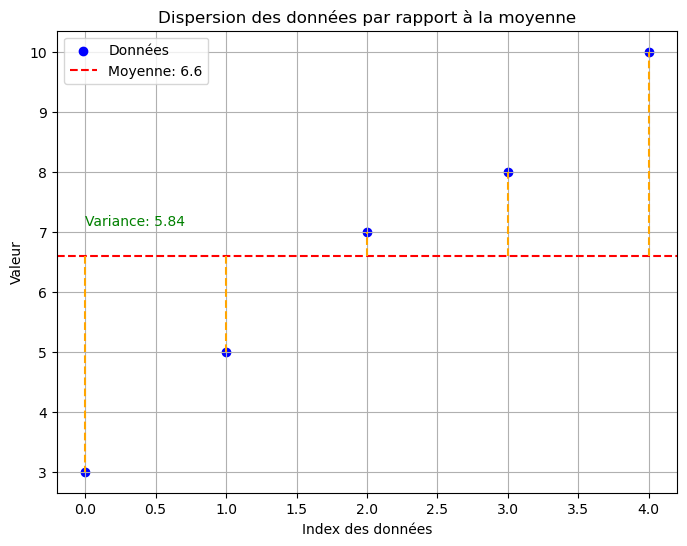

In [12]:
# Création d'un graphique de dispersion
plt.figure(figsize=(8, 6))  # Définir la taille de la figure (largeur = 8, hauteur = 6)

plt.scatter(range(len(data)), data, color='blue', label='Données')
# Création d'un graphique de dispersion (scatter plot) :
# - range(len(data)) : les indices des données (axe x)
# - data : les valeurs des données (axe y)
# - color='blue' : couleur des points en bleu
# - label='Données' : étiquette pour les données dans la légende

plt.axhline(mean, color='red', linestyle='--', label=f'Moyenne: {mean}')
# Ajout d'une ligne horizontale représentant la moyenne :
# - mean : la valeur moyenne à tracer (axe y)
# - color='red' : couleur de la ligne en rouge
# - linestyle='--' : style de ligne pointillée
# - label=f'Moyenne: {mean}' : étiquette pour la moyenne dans la légende

plt.text(0, mean + 0.5, f'Variance: {variance:.2f}', color='green')
# Ajout d'un texte sur le graphique pour afficher la variance :
# - 0 : position sur l'axe x
# - mean + 0.5 : position sur l'axe y (légèrement au-dessus de la moyenne)
# - f'Variance: {variance:.2f}' : texte à afficher, formaté pour montrer la variance avec 2 décimales
# - color='green' : couleur du texte en vert

# Ajout de lignes montrant les écarts au carré
for i, deviation in enumerate(deviations):
    plt.plot([i, i], [mean, data[i]], color='orange', linestyle='--')
    # Pour chaque déviation :
    # - plt.plot([i, i], [mean, data[i]]) : tracer une ligne verticale du point moyen au point de donnée
    #   - [i, i] : les coordonnées x (la ligne est verticale, donc x ne change pas)
    #   - [mean, data[i]] : les coordonnées y (de la moyenne à la valeur de donnée)
    # - color='orange' : couleur des lignes en orange
    # - linestyle='--' : style de ligne pointillée

plt.xlabel('Index des données')  # Ajouter une étiquette à l'axe x
plt.ylabel('Valeur')  # Ajouter une étiquette à l'axe y
plt.title('Dispersion des données par rapport à la moyenne')  # Ajouter un titre au graphique
plt.legend()  # Afficher la légende (pour les étiquettes définies précédemment)
plt.grid(True)  # Afficher la grille sur le graphique pour améliorer la lisibilité
plt.show()  # Afficher le graphique


In [8]:
# La correlation  

In [13]:
import pandas as pd
# Création du DataFrame
data = {
    'Jour': [1, 2, 3, 4, 5],
    'Humidité (%)': [80, 70, 60, 40, 20],
    'Température (°C)': [25, 20, 22, 30, 35],
    'Pluie (mm)': [10, 0, 5, 0, 0],
    'Vent (km/h)': [5, 15, 20, 25, 30],
    'Chaleur (°C)': [28, 25, 27, 32, 35]
}
df = pd.DataFrame(data)

In [14]:
correlation_matrix = df[['Humidité (%)', 'Température (°C)', 'Pluie (mm)', 'Vent (km/h)', 'Chaleur (°C)']].corr()
correlation_matrix

,Humidité (%),Température (°C),Pluie (mm),Vent (km/h),Chaleur (°C)
Humidité (%),1.000000,-0.863446,0.673146,-0.949812,-0.894770
Température (°C),-0.863446,1.000000,-0.329513,0.668212,0.995642
Pluie (mm),0.673146,-0.329513,1.000000,-0.784672,-0.360002
Vent (km/h),-0.949812,0.668212,-0.784672,1.000000,0.721096
Chaleur (°C),-0.894770,0.995642,-0.360002,0.721096,1.000000


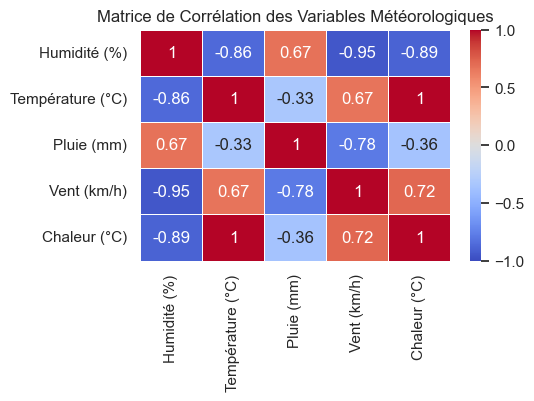

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style des graphiques
sns.set(style='white')
# Cette ligne définit le style global des graphiques générés par Seaborn. 
# 'white' indique un fond blanc, ce qui est souvent utilisé pour rendre les graphiques plus clairs.

# Création d'une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(5, 3))
# Cette ligne crée une nouvelle figure avec une taille spécifique de 5 par 3 pouces.
# Cela définit la taille du graphique affiché.

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
# sns.heatmap : Crée une carte thermique (heatmap) qui visualise les valeurs de la matrice de corrélation.
# correlation_matrix : La matrice de corrélation qui montre les corrélations entre les variables.
# annot=True : Affiche les valeurs numériques à l'intérieur de chaque cellule de la carte thermique.
# cmap='coolwarm' : Utilise la palette de couleurs 'coolwarm', qui varie du bleu (valeurs basses) au rouge (valeurs élevées).
# vmin=-1, vmax=1 : Définit les valeurs minimales et maximales de la palette de couleurs. Ici, -1 et 1 représentent les corrélations les plus négatives et les plus positives, respectivement.
# linewidths=0.5 : Définit l'épaisseur des lignes qui séparent les cellules de la carte thermique.

plt.title('Matrice de Corrélation des Variables Météorologiques')
# Définit le titre de la carte thermique pour indiquer qu'il s'agit d'une matrice de corrélation des variables météorologiques.

plt.show()
# Affiche le graphique généré dans la sortie standard (par exemple, une fenêtre de graphique ou un notebook).


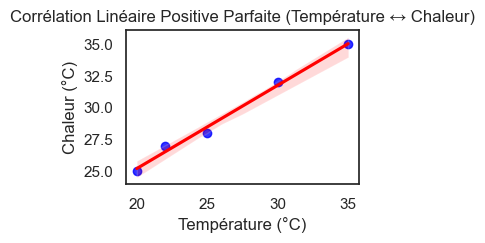

In [18]:
# Scatter plots pour visualiser les relations individuelles
# Température et Chaleur (r = 1)
plt.figure(figsize=(3, 2))
sns.regplot(x='Température (°C)', y='Chaleur (°C)', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Corrélation Linéaire Positive Parfaite (Température ↔ Chaleur)')
plt.show()

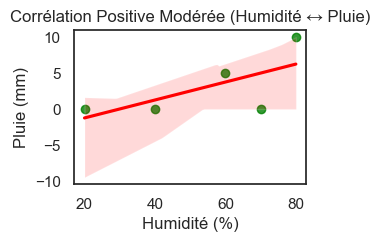

In [13]:
# Humidité et Pluie (0 < r < 1)
plt.figure(figsize=(3, 2))
sns.regplot(x='Humidité (%)', y='Pluie (mm)', data=df, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Corrélation Positive Modérée (Humidité ↔ Pluie)')
plt.show()

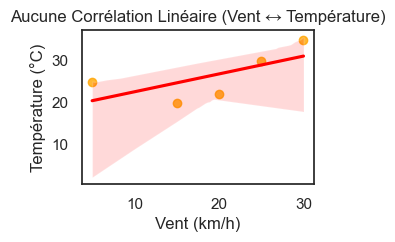

In [14]:
# Vent et Température (r = 0)
plt.figure(figsize=(3, 2))
sns.regplot(x='Vent (km/h)', y='Température (°C)', data=df, scatter_kws={'color':'orange'}, line_kws={'color':'red'})
plt.title('Aucune Corrélation Linéaire (Vent ↔ Température)')
plt.show()

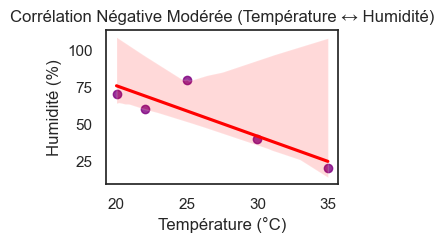

In [15]:
# Température et Humidité (-1 < r < 0)
plt.figure(figsize=(3, 2))
sns.regplot(x='Température (°C)', y='Humidité (%)', data=df, scatter_kws={'color':'purple'}, line_kws={'color':'red'})
plt.title('Corrélation Négative Modérée (Température ↔ Humidité)')
plt.show()

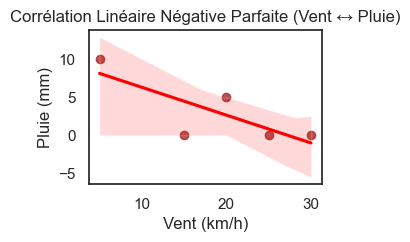

In [16]:
# Vent et Pluie (r = -1)
plt.figure(figsize=(3, 2))
sns.regplot(x='Vent (km/h)', y='Pluie (mm)', data=df, scatter_kws={'color':'brown'}, line_kws={'color':'red'})
plt.title('Corrélation Linéaire Négative Parfaite (Vent ↔ Pluie)')
plt.show()


In [18]:
# Normalisation et standardisation 

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
# Normalisation des données
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df)

# Convertir les données normalisées en DataFrame pour un affichage plus clair
df_normalized = pd.DataFrame(data_normalized, columns=df.columns)

print("\nDonnées normalisées :")
df_normalized



Données normalisées :


,Jour,Humidité (%),Température (°C),Pluie (mm),Vent (km/h),Chaleur (°C)
0,0.00,1.000000,0.333333,1.0,0.0,0.3
1,0.25,0.833333,0.000000,0.0,0.4,0.0
2,0.50,0.666667,0.133333,0.5,0.6,0.2
3,0.75,0.333333,0.666667,0.0,0.8,0.7
4,1.00,0.000000,1.000000,0.0,1.0,1.0


In [21]:
# Standardisation des données
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

# Convertir les données standardisées en DataFrame pour un affichage plus clair
df_standardized = pd.DataFrame(data_standardized, columns=df.columns)

print("\nDonnées standardisées :")
df_standardized



Données standardisées :


,Jour,Humidité (%),Température (°C),Pluie (mm),Vent (km/h),Chaleur (°C)
0,-1.414214,1.207020,-0.256288,1.75,-1.627467,-0.387694
1,-0.707107,0.742781,-1.171603,-0.75,-0.464991,-1.218467
2,0.000000,0.278543,-0.805477,0.50,0.116248,-0.664619
3,0.707107,-0.649934,0.659027,-0.75,0.697486,0.720003
4,1.414214,-1.578410,1.574342,-0.75,1.278724,1.550777
